# Introdução

Este notebook é a resolução de um trabalho de pós-gradução (em ciencia de dados e Inteligencia artificial) do `Instituto Mauá de Tecnologia`, para a diciplina de Tópicos Avançados de Inteligência Artificial. 

O trabalho foi proposto pelo professor `Murilo Zanini de Carvalho`, tendo como intuito utilizar um ou mais serviços de aprendizado de máquina de um ou mais dos principais players do mercado em web service (GCP, AWS ou Azure), afim de propor uma solução rápida e prática para um determinado problema.

A proposta aqui é a resolução de problema clássico de classifição entre cães e gatos, utilizando o servico de Custom Vision da Azure. Apesar de ser um problema simples, todas as etapas necessárias para utilizar a plataforma em questão serão solucionadas, afim de obter um bom desempenho.

Vale ressaltar que este trabalho foi baseado na publicacao de Millan Sanches, que fez um guide extremamente interessante, simples e prático para abordar o problema.
#### https://medium.com/natural-stupidity/image-classification-using-two-approches-pretrained-models-with-fast-ai-38367643e699
---

Este trabalho foi realizado por `Ricardo Rossi Tegao` R.A.:20.83988-0

# Treinamento

Para que seja possivel criar uma solução de AutoML para qualquer tipo de troblema relacionado a visão computacional, a Azure permite que o usuário insira os dados para que o modelo seja treinado, o que é muito mais interessante do que ter alguns modelos já treinados com datasets padrões.

Após a inserção dos dados a plataforma possibilita a escolha de duas abordagens de treinamento, a básica e a avançada (todo o trabalho foi desenvolvido em cima da abordagem basica de treinamento)

Os dados de treinamento foram tirados do dataset abaixo.

http://files.fast.ai/files/dogscats.zip 

# Performânce do Modelo

Logo após o treinamento ser concluido, a propria plataforma fornece algumas métricas de avaliação:

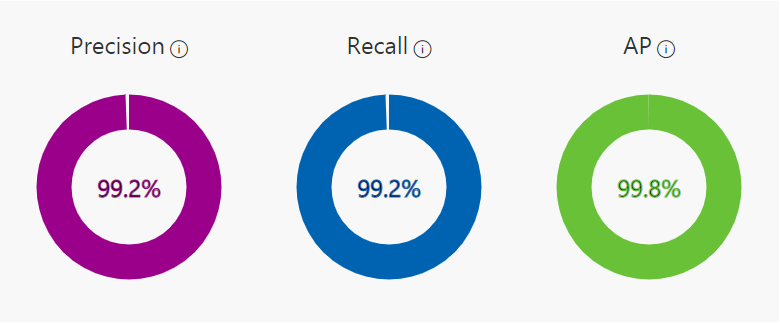

É possível notar que mesmo com o treinamento básico, a performânce do modelo é praticamente perfeita, o que torna a solução de AutoML da Azure extremamente interessante pela praticidade, velocidade e performance.

A seguir a API de predição do modelo será utilizada, afim de realizar alguns testes em imagens nunca antes vistas pelo modelo.

# Importando Bibliotecas


In [1]:
from PIL import Image
import requests
from io import BytesIO

# Predizendo novas Imagens

A forma utilizada no link do Medium citado anteriormente, mostra como prever uma imagem a partir de um arquivo local. Neste trabalho apenas imagens de URL's serão utilizadas.

In [1]:
prediction_key = "YOUR KEY HERE"
url = "END POINT"

## Prevendo Cachorro

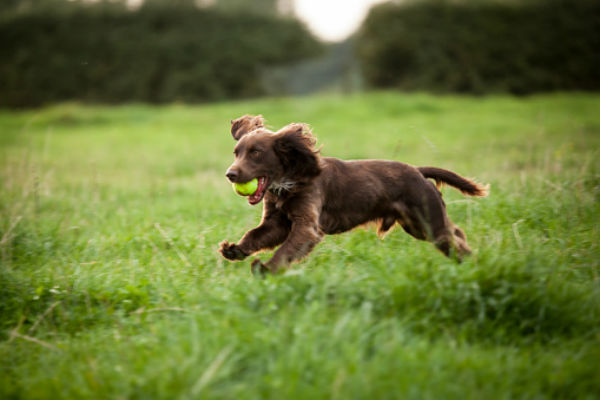

In [3]:
response = requests.get("http://cdn.akc.org/content/article-body-image/boykin_spaniel_dog_pictures.jpg")
img = Image.open(BytesIO(response.content))
img

In [4]:
payload = """{"Url": "http://cdn.akc.org/content/article-body-image/boykin_spaniel_dog_pictures.jpg"}"""
headers = {
    'prediction-key': prediction_key,
    'content-type': "application/json",
    }
response = requests.post(url, data=payload, headers=headers)
print("Esta imagem eh um {}, com uma certeza de {}".format(response.json()['predictions'][0]['tagName'], response.json()['predictions'][0]['probability']))


Esta imagem eh um dog, com uma certeza de 0.9999999


## Prevendo gato

Vendo como o modelo se comporta ao tentar predizer grandes felinos. Obviamente que qual erro de predição é completamente esperado, pois o modelo nã foi treinado para prever tigres e/ou leões.

- Tigre

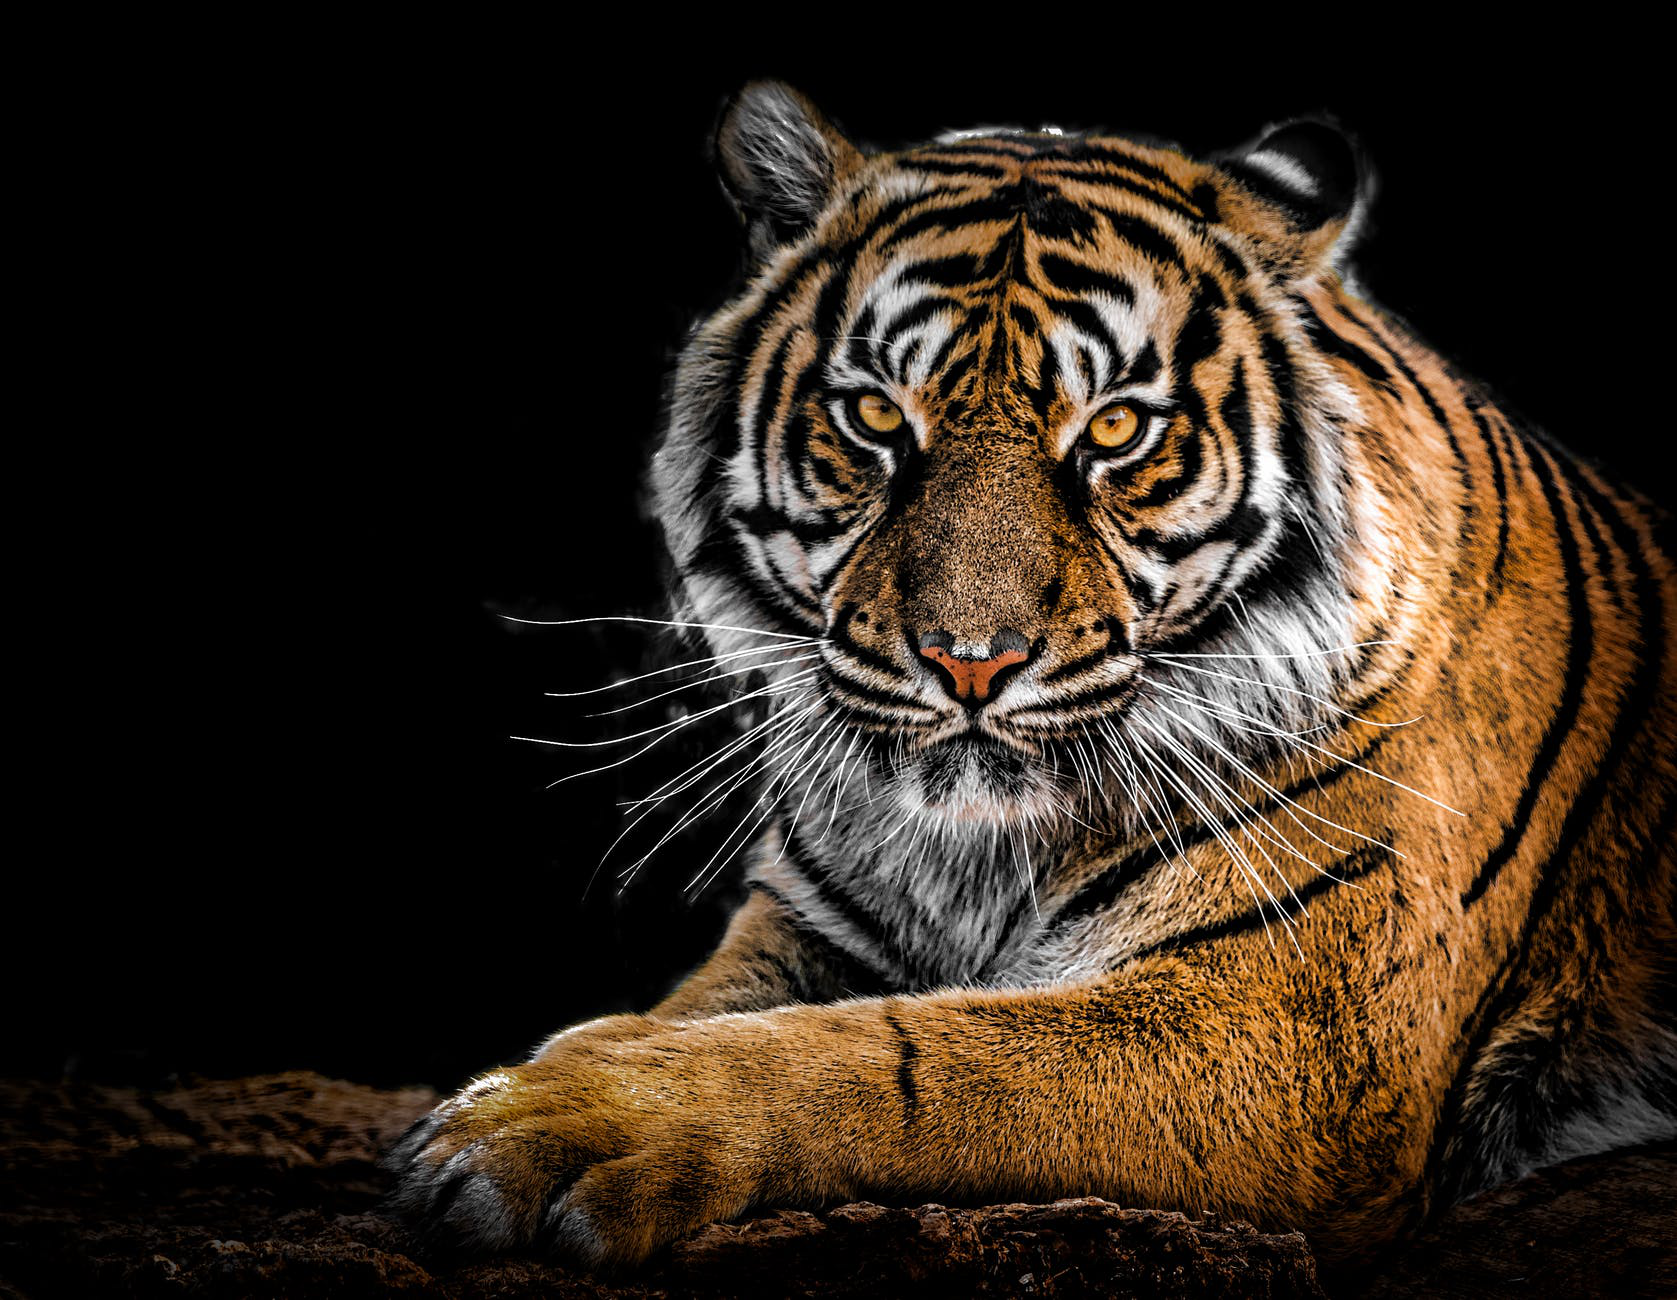

In [5]:
response = requests.get("https://images.pexels.com/photos/792381/pexels-photo-792381.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940")
img = Image.open(BytesIO(response.content))
img

- Leão

In [6]:
payload = """{"Url": "https://images.pexels.com/photos/792381/pexels-photo-792381.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940"}"""
headers = {
    'prediction-key': prediction_key,
    'content-type': "application/json",
    }

response = requests.post(url, data=payload, headers=headers)

print("Esta imagem eh um {}, com uma certeza de {}".format(response.json()['predictions'][0]['tagName'], response.json()['predictions'][0]['probability']))

Esta imagem eh um cat, com uma certeza de 0.9999917


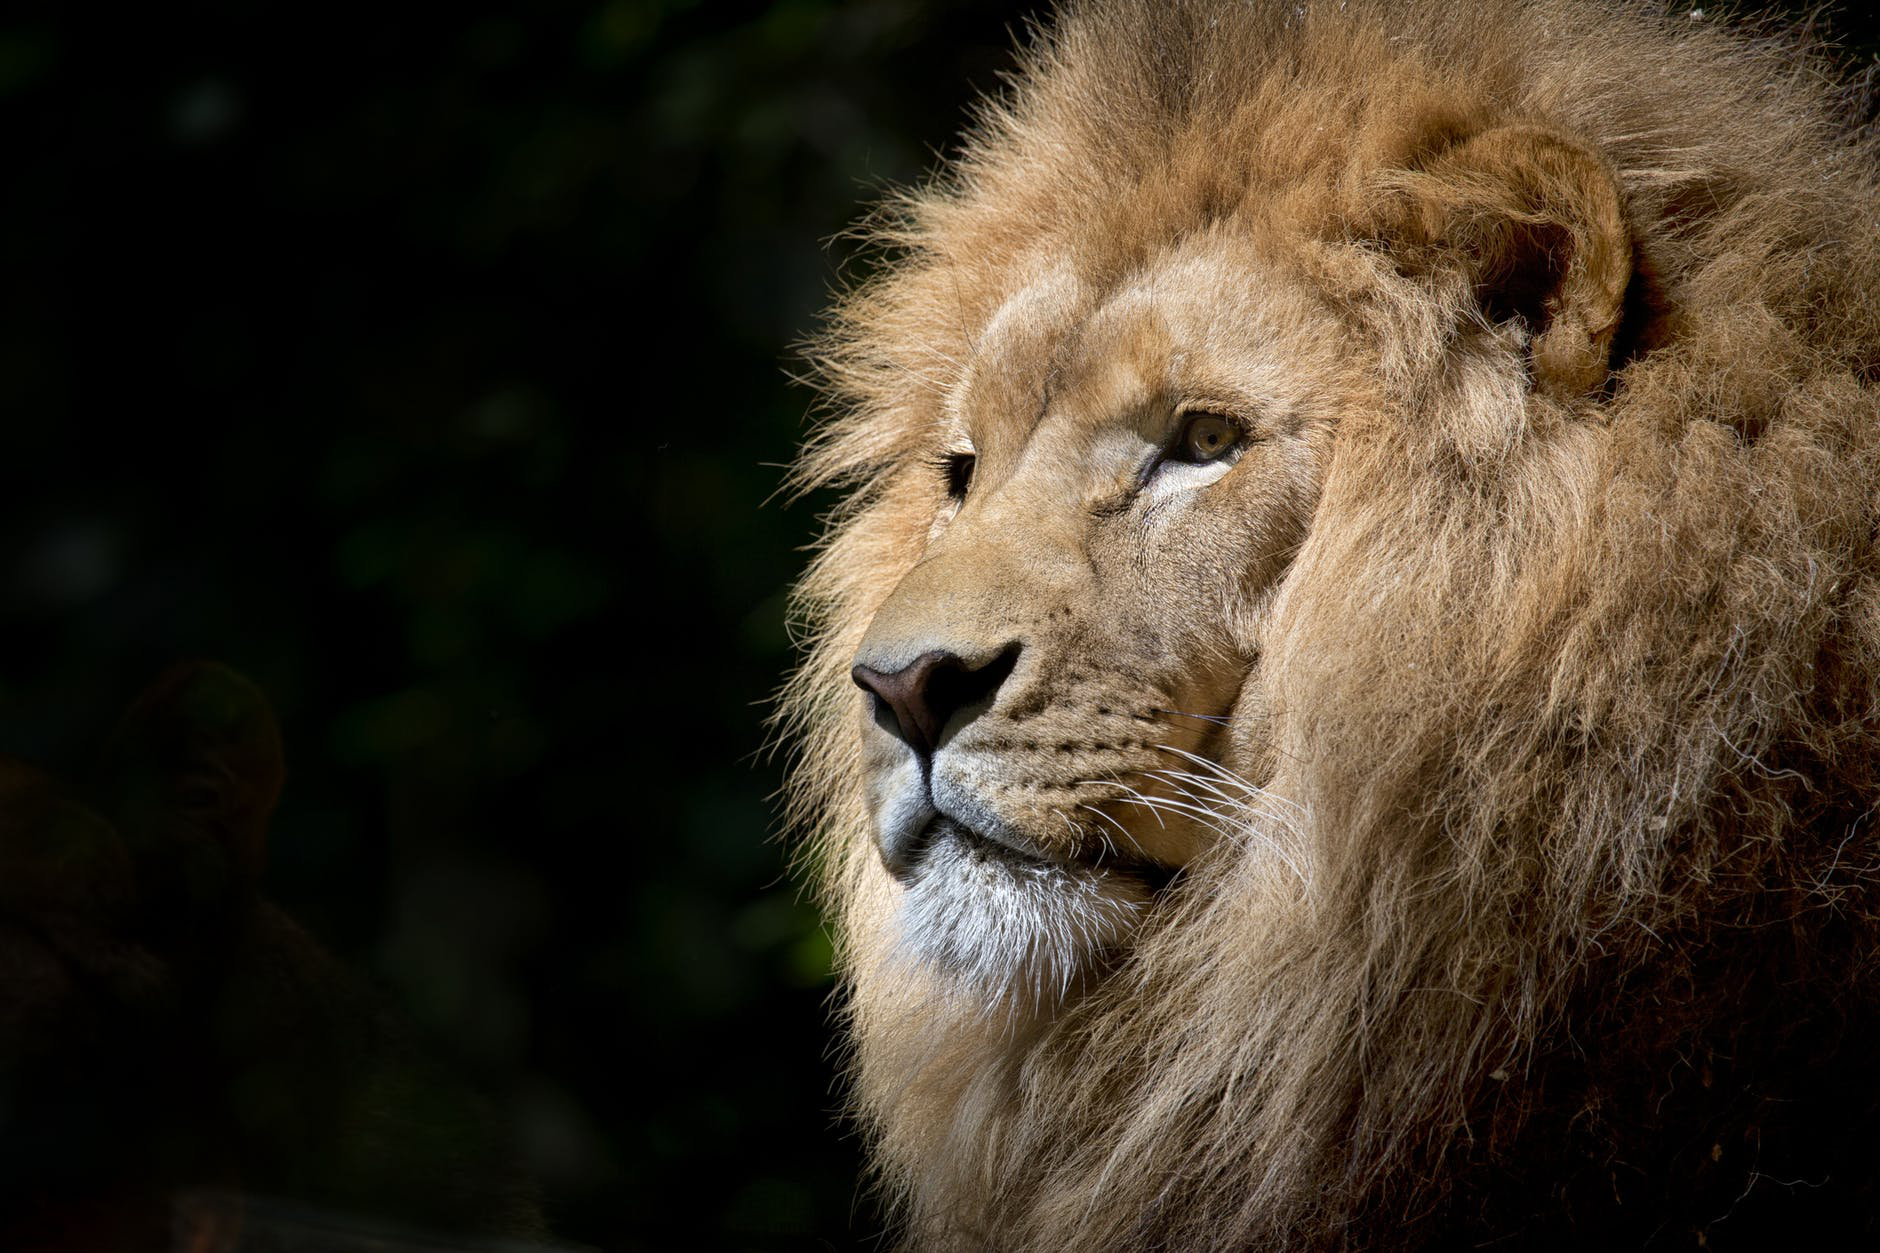

In [8]:
response = requests.get("https://images.pexels.com/photos/33045/lion-wild-africa-african.jpg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940")
img = Image.open(BytesIO(response.content))
img

In [9]:
payload = """{"Url": "https://images.pexels.com/photos/33045/lion-wild-africa-african.jpg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940"}"""
headers = {
    'prediction-key': prediction_key,
    'content-type': "application/json",
    }

response = requests.post(url, data=payload, headers=headers)

print("Esta imagem eh um {}, com uma certeza de {}".format(response.json()['predictions'][0]['tagName'], response.json()['predictions'][0]['probability']))

Esta imagem eh um dog, com uma certeza de 0.9443146


- Gato em embalagem

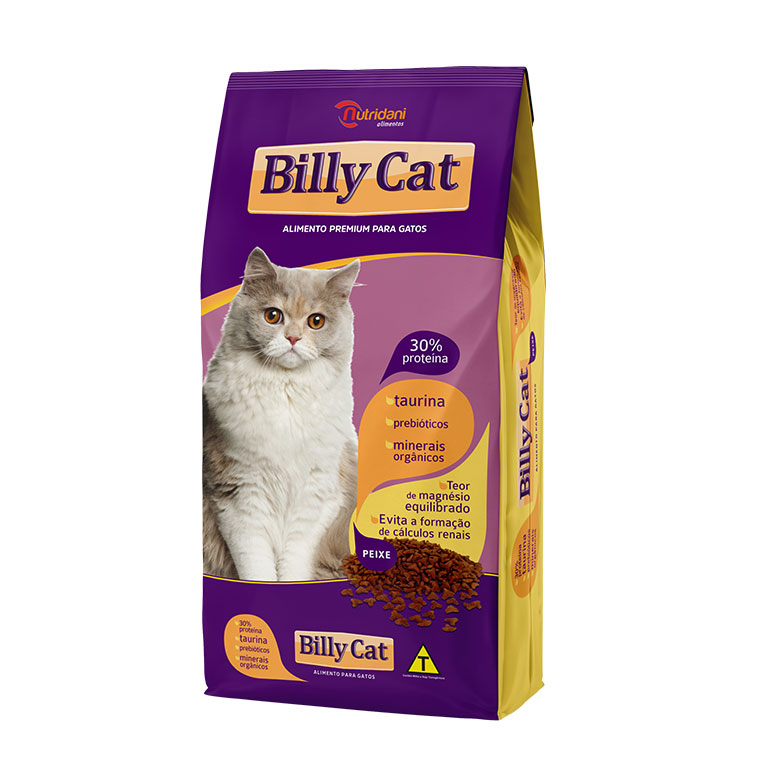

In [10]:
response = requests.get("https://www.nutridani.com.br/wp-content/uploads/2020/07/bcat-peixe.jpg")
img = Image.open(BytesIO(response.content))
img

In [11]:
payload = """{"Url": "https://www.nutridani.com.br/wp-content/uploads/2020/07/bcat-peixe.jpg"}"""
headers = {
    'prediction-key': prediction_key,
    'content-type': "application/json",
    }

response = requests.post(url, data=payload, headers=headers)

print("Esta imagem eh um {}, com uma certeza de {}".format(response.json()['predictions'][0]['tagName'], response.json()['predictions'][0]['probability']))

Esta imagem eh um cat, com uma certeza de 0.999934852


# Conclusão

Com poquíssimas linhas de código e alguns minutos de leitura na documentação, foi possível desenvolver uma solução simples e eficiente para um problema classico.

A abordagem do AutoML pode ser a solução para diversos problemas reais, bastando descobrir se o custo atrelado compensa para a aplicação em questão.